In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('hls')
sns.set(style="white", context="talk")
import scipy.stats as stats
%matplotlib inline
import scipy.stats as stats
from datetime import datetime as dt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
elements = pd.read_csv('../data/elements.csv', index_col='title')
stats = pd.read_csv('../data/video_stats2.csv', index_col='episode_title')

In [4]:
print('the number of items in elements df is', len(elements))
elements.head()

the number of items in elements df is 403


,EPISODE,apple_frame,barn,beach,bridge,bushes,cabin,cirrus,cliff,clouds,conifer,cumulus,deciduous,fence,flowers,fog,grass,hills,lake,mountain,mountains,night,ocean,palm_trees,path,river,rocks,snow,snowy_mountain,structure,sun,tree,trees,waterfall,waves,winter
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a walk in the woods,S01E01,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
mt. mckinley,S01E02,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1
ebony sunset,S01E03,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1
winter mist,S01E04,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
quiet stream,S01E05,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0


The elements dataframe is already shorter than the stats dataframe, but we need to drop the episodes that were made irrelevant from cleaning (infrequent topics, or only hosted by a guest, not Bob Ross).

In [5]:
droprows = elements[elements.sum(axis=1)==0].index.tolist()
print('there are ', len(droprows),' episodes to drop')

there are  6  episodes to drop


In [6]:
elements = elements.drop(droprows)

In [7]:
elements.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, a walk in the woods to wilderness day
Data columns (total 36 columns):
EPISODE           397 non-null object
apple_frame       397 non-null int64
barn              397 non-null int64
beach             397 non-null int64
bridge            397 non-null int64
bushes            397 non-null int64
cabin             397 non-null int64
cirrus            397 non-null int64
cliff             397 non-null int64
clouds            397 non-null int64
conifer           397 non-null int64
cumulus           397 non-null int64
deciduous         397 non-null int64
fence             397 non-null int64
flowers           397 non-null int64
fog               397 non-null int64
grass             397 non-null int64
hills             397 non-null int64
lake              397 non-null int64
mountain          397 non-null int64
mountains         397 non-null int64
night             397 non-null int64
ocean             397 non-null int64
palm_trees        3

In [8]:
print('the number of items in stats df is', len(stats))
stats.head()

the number of items in stats df is 446


,id,title,viewCount,likeCount,favoriteCount,dislikeCount,commentCount,season_num,episode_num
episode_title,,,,,,,,,
glacier lake,TohG7F8M3Ls,Bob Ross - Glacier Lake (Season 28 Episode 6),1160972,14005,0,311,1589,28.0,6.0
island in the wilderness,lLWEXRAnQd0,Bob Ross - Island in the Wilderness (Season 29...,7529170,152477,0,2249,21209,29.0,1.0
reflections of calm,kJFB6rH3z2A,Bob Ross - Reflections of Calm (Season 31 Epis...,1432050,17979,0,334,2346,31.0,1.0
mountain summit,kasGRkfkiPM,Bob Ross - Mountain Summit (Season 13 Episode 10),3041171,22498,0,542,3310,13.0,10.0
delightful meadow home,tWoInh2USOs,Bob Ross - Delightful Meadow Home (Season 26 E...,453935,3930,0,96,457,26.0,2.0


Join tables, where unmatched records in ```stats``` are dropped.

In [9]:
joined = elements.join(stats, how='left')

In [10]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, a mild winter's day to woodgrain view
Data columns (total 45 columns):
EPISODE           399 non-null object
apple_frame       399 non-null int64
barn              399 non-null int64
beach             399 non-null int64
bridge            399 non-null int64
bushes            399 non-null int64
cabin             399 non-null int64
cirrus            399 non-null int64
cliff             399 non-null int64
clouds            399 non-null int64
conifer           399 non-null int64
cumulus           399 non-null int64
deciduous         399 non-null int64
fence             399 non-null int64
flowers           399 non-null int64
fog               399 non-null int64
grass             399 non-null int64
hills             399 non-null int64
lake              399 non-null int64
mountain          399 non-null int64
mountains         399 non-null int64
night             399 non-null int64
ocean             399 non-null int64
palm_trees        3

In [11]:
droplist = joined.index[joined['id'].isnull()==True].tolist()

In [12]:
joined_final = joined.drop(droplist)

In [13]:
joined_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, a mild winter's day to woodgrain view
Data columns (total 45 columns):
EPISODE           302 non-null object
apple_frame       302 non-null int64
barn              302 non-null int64
beach             302 non-null int64
bridge            302 non-null int64
bushes            302 non-null int64
cabin             302 non-null int64
cirrus            302 non-null int64
cliff             302 non-null int64
clouds            302 non-null int64
conifer           302 non-null int64
cumulus           302 non-null int64
deciduous         302 non-null int64
fence             302 non-null int64
flowers           302 non-null int64
fog               302 non-null int64
grass             302 non-null int64
hills             302 non-null int64
lake              302 non-null int64
mountain          302 non-null int64
mountains         302 non-null int64
night             302 non-null int64
ocean             302 non-null int64
palm_trees        3

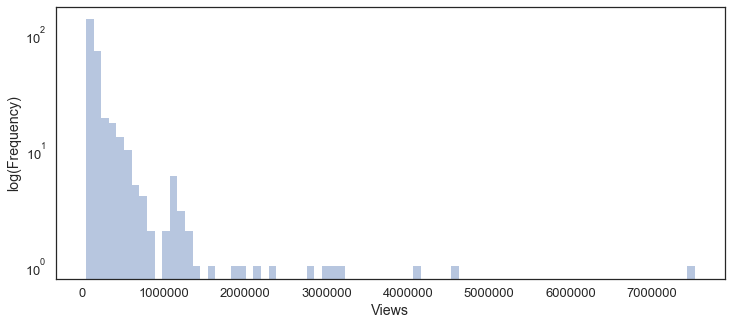

In [52]:
fig,ax = plt.subplots(1,1)
sns.distplot(joined_final['viewCount'], kde=False, bins=80)
ax.set_yscale('log')
fig.set_size_inches(12,5)
ax.set_ylabel('log(Frequency)')
ax.set_xlabel('Views')
fig.savefig('../figs/views_hist.png')

It looks like there's a natural break after the 9th bin, or just under 1 million views.  

In [41]:
(joined_final.viewCount.max()/80)*9

847031.625

We could round this up to 900,000 views as the threshold for 'viral'

In [ ]:
joined_final.to_csv('../data/data.csv')